In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import argparse
import pandas as pd
import seaborn as sns

In [2]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure tit
plt.rc('lines', linewidth=1)
cols = ['#ff7f00', '#4daf4a', '#377eb8']
plt.rcParams['font.sans-serif'] = "Helvetica"

# Fixing parameters of MGLM

In [4]:
# Set the parameters of the MoGLM
num_states = 2        # number of discrete states
obs_dim = 1           # number of observed dimensions
num_categories = 2    # number of categories for output
input_dim = 2         # input dimensions

# Set parameters
true_pi0 = np.array([0.7, 0.3])
true_weights = np.array([[3,-6], [3, 6]])
true_weights = np.reshape(true_weights, (num_states,input_dim))

# Number of samples
num_trials = 2000
# Number of initial samples
init_trials = 100

# List of possible inputs
stim_vals = np.arange(-10,10,step=0.01).tolist()
input_list = np.ones((len(stim_vals), input_dim))
input_list[:,0] = stim_vals

# Loading and plotting RMSE between recovered and true GLM weights

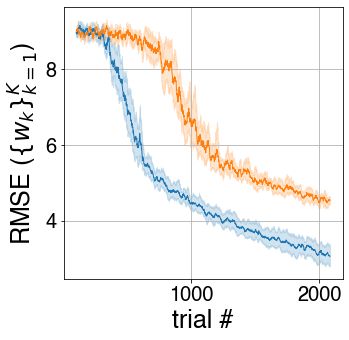

In [5]:
%matplotlib inline

# Plotting error in weights
num_repeats = 10

error=[]

for seed in np.arange(num_repeats):
    weights_active = np.load("Results_MGLM/" + str(input_dim) + "dActive_atseed"+str(seed)+"_weights.npy")
    error_in_weights_active = np.linalg.norm(weights_active - true_weights, axis=(1,2))
    error_in_weights_active = np.convolve(error_in_weights_active, np.ones(20)/20, mode='valid') 
    error = error + error_in_weights_active.tolist()
    
    num_trials = error_in_weights_active.shape[0]
    
    weights_random = np.load("Results_MGLM/" + str(input_dim) + "dRandom_atseed"+str(seed)+"_weights.npy")
    error_in_weights_random = np.linalg.norm(weights_random - true_weights, axis=(1,2))
    error_in_weights_random = np.convolve(error_in_weights_random, np.ones(20)/20, mode='valid')
    error = error + error_in_weights_random.tolist()

    
sampling_method = (['active']*num_trials + ['random']*num_trials)*num_repeats
trials = (np.arange(num_trials)+init_trials).tolist()*2*num_repeats
    
weights_list = {"trial #": trials, "Method": sampling_method, "RMSE ($\{w_k\}_{k=1}^K$)": error}
df = pd.DataFrame(weights_list, columns = ['trial #', 'Method', "RMSE ($\{w_k\}_{k=1}^K$)"])
fig, ax = plt.subplots(figsize = (5,5))
sns.lineplot(x="trial #", y="RMSE ($\{w_k\}_{k=1}^K$)", hue="Method", data=df, ax = ax)
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles, labels=labels)
ax.get_legend().remove()
      
plt.xticks()
plt.yticks()
plt.grid()

# Loading and plotting error between recovered and true state probabilites

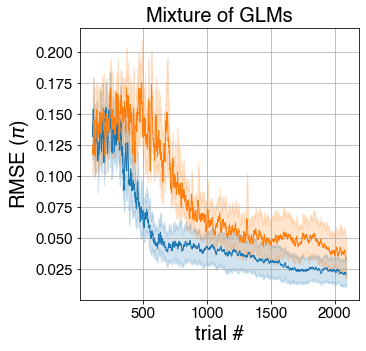

In [23]:
%matplotlib inline

# Plotting error in pis
num_repeats = 10
error=[]

for seed in np.arange(num_repeats):
    pis_active = np.load("Results_MGLM/" + str(input_dim) + "dActive_atseed"+str(seed)+"_pis.npy")
    error_in_pis_active = np.linalg.norm(pis_active - true_pi0, axis=(1))
    error_in_pis_active = np.convolve(error_in_pis_active, np.ones(10)/10, mode='valid') 
    error = error + error_in_pis_active.tolist()
    
    num_trials = error_in_pis_active.shape[0]

    pis_random = np.load("Results_MGLM/" + str(input_dim) + "dRandom_atseed"+str(seed)+"_pis.npy")
    error_in_pis_random = np.linalg.norm(pis_random - true_pi0, axis=(1))
    error_in_pis_random = np.convolve(error_in_pis_random, np.ones(10)/10, mode='valid') 
    error = error + error_in_pis_random.tolist()

sampling_method = (['active']*num_trials + ['random']*num_trials)*num_repeats
trials = (np.arange(num_trials)+init_trials).tolist()*2*num_repeats
    

weights_list = {"trial #": trials, "Method": sampling_method, "RMSE ($\pi$)": error}
df = pd.DataFrame(weights_list, columns = ['trial #', 'Method', 'RMSE ($\pi$)'])
fig, ax = plt.subplots(figsize = (5,5))
sns.lineplot(x="trial #", y="RMSE ($\pi$)", hue="Method", data=df, ax = ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

plt.xticks()
plt.yticks()
plt.grid()

Text(0.5, 1.0, 'Mixture of GLMs')

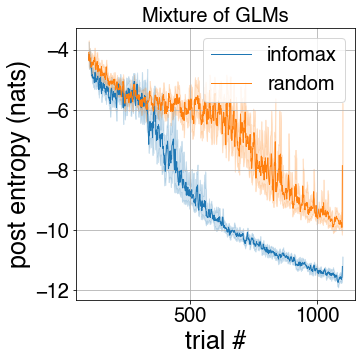

In [9]:
import scipy
from scipy import signal

# Plotting posterior entropy
num_repeats = 10
init_trials = 100
num_trials = 2000

logdetcovs = []

for seed in np.arange(num_repeats):
    logdetcov_active = np.load("Results_MGLM/" + str(input_dim) + "dActive_atseed"+str(seed) + "_posteriorcov.npy")[:1000]
    logdetcov_active = signal.medfilt(logdetcov_active, 5)
    num_trials = logdetcov_active.shape[0]-1
    logdetcovs = logdetcovs + logdetcov_active[1:].tolist()
    logdetcov_random = np.load("Results_MGLM/" + str(input_dim) + "dRandom_atseed"+str(seed) + "_posteriorcov.npy")[:1000]
    logdetcov_random = signal.medfilt(logdetcov_random, 5)
    logdetcovs = logdetcovs + logdetcov_random[1:].tolist()        

sampling_method = (['infomax']*num_trials + ['random']*num_trials)*num_repeats
trials = (np.arange(num_trials)+init_trials).tolist()*2*num_repeats


postcov_list = {"trial #": trials, "Method": sampling_method, "post entropy (nats)": logdetcovs}
df = pd.DataFrame(postcov_list, columns = ['trial #', 'Method', 'post entropy (nats)'])
fig, ax = plt.subplots(figsize = (5,5))
sns.lineplot(x="trial #", y="post entropy (nats)", hue="Method", data=df, ax = ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
plt.xticks()
plt.yticks()
plt.grid()
plt.title("Mixture of GLMs", fontsize=20)